Using the pennylane in-built functions to transform the quantum circuit. 

[0.    0.    0.    0.    0.375 0.125 0.375 0.125]
Depth of circuit =  9


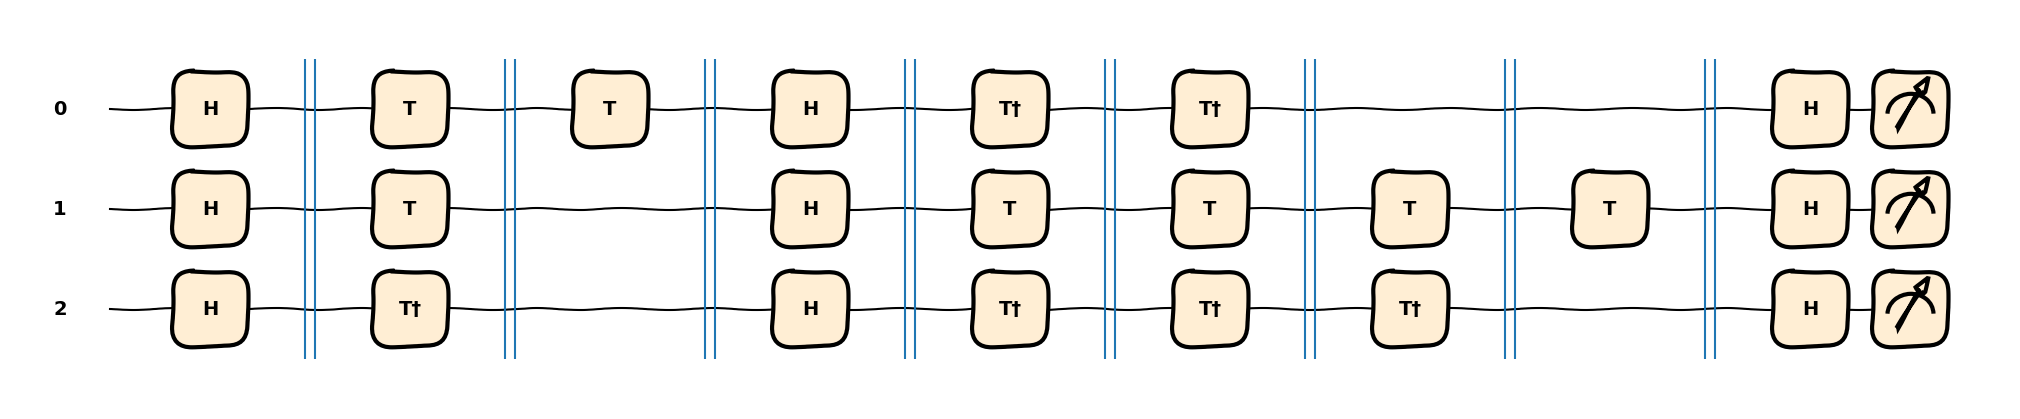

In [25]:
import pennylane as pl
import matplotlib.pyplot as plt 
import numpy as np 

device = pl.device('default.qubit', wires=3)

@pl.qnode(device)
def circuit():
    pl.Hadamard(wires=0)
    pl.Hadamard(wires=1)
    pl.Hadamard(wires=2)
    pl.Barrier(wires=[0,1,2])
    pl.T(wires=0)
    pl.T(wires=1)
    pl.adjoint(pl.T)(wires=2)
    pl.Barrier(wires=[0,1,2])
    pl.T(wires=0)
    pl.Barrier(wires=[0,1,2])

    pl.Hadamard(wires=0)
    pl.Hadamard(wires=1)
    pl.Hadamard(wires=2)
    pl.Barrier(wires=[0,1,2])

    pl.adjoint(pl.T)(wires=0)
    pl.T(wires=1)
    pl.adjoint(pl.T)(wires=2)
    pl.Barrier(wires=[0,1,2])

    pl.adjoint(pl.T)(wires=0)
    pl.T(wires=1)
    pl.adjoint(pl.T)(wires=2)
    pl.Barrier(wires=[0,1,2])

    pl.T(wires=1)
    pl.adjoint(pl.T)(wires=2)
    pl.Barrier(wires=[0,1,2])

    pl.T(wires=1)
    pl.Barrier(wires=[0,1,2])

    pl.Hadamard(wires=0)
    pl.Hadamard(wires=1)
    pl.Hadamard(wires=2)

    return pl.probs(wires=[0, 1, 2])

qnode = pl.QNode(circuit, device)()
circ = pl.specs(circuit)()
print (np.round(qnode, 5))
print ("Depth of circuit = ", circ['depth']-circ["resources"].gate_types['Barrier'])

pl.draw_mpl(circuit, decimals=1, style="sketch", show_all_wires=True)()
plt.show()

### Optimized circuit

[0.    0.    0.    0.    0.375 0.125 0.375 0.125]
Depth of circuit =  6


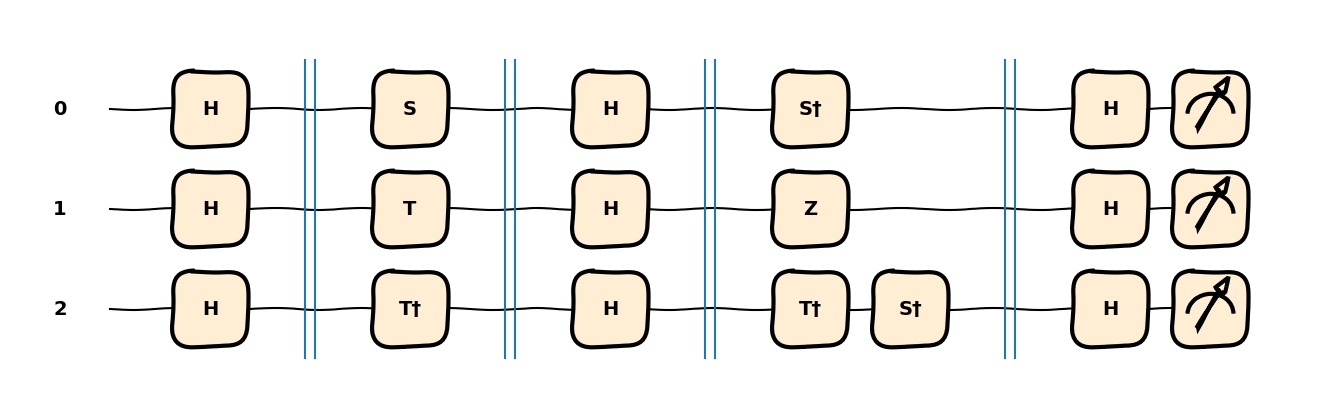

In [26]:
import pennylane as pl
import matplotlib.pyplot as plt 
import numpy as np 

device = pl.device('default.qubit', wires=3)

@pl.qnode(device)
def circuit():
    pl.Hadamard(wires=0)
    pl.Hadamard(wires=1)
    pl.Hadamard(wires=2)
    pl.Barrier(wires=[0,1,2])
    pl.S(wires=0)
    pl.T(wires=1)
    pl.adjoint(pl.T)(wires=2)
    pl.Barrier(wires=[0,1,2])
    
    pl.Hadamard(wires=0)
    pl.Hadamard(wires=1)
    pl.Hadamard(wires=2)
    pl.Barrier(wires=[0,1,2])

    pl.adjoint(pl.S)(wires=0)
    pl.PauliZ(wires=1)
    pl.adjoint(pl.T)(wires=2)
    pl.adjoint(pl.S)(wires=2)
    pl.Barrier(wires=[0,1,2])

    pl.Hadamard(wires=0)
    pl.Hadamard(wires=1)
    pl.Hadamard(wires=2)

    return pl.probs(wires=[0, 1, 2])

qnode = pl.QNode(circuit, device)()
circ = pl.specs(circuit)()

print (np.round(qnode, 5))
print ("Depth of circuit = ", circ['depth']-circ["resources"].gate_types['Barrier'])

pl.draw_mpl(circuit, decimals=1, style="sketch", show_all_wires=True)()
plt.show()